<a href="https://colab.research.google.com/github/codingbird1234/data_science/blob/main/unitedAir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [6]:
#united = Table.read_table(path_data + 'united_summer2015.csv')
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [8]:
united.column('Delay').min()

-16

In [9]:
united.column('Delay').max()

580

In [10]:
n = united.where('Delay', are.above(300))
n

Date,Flight Number,Destination,Delay
6/1/15,760,JFK,352
6/2/15,317,IND,312
6/3/15,73,HNL,354
6/3/15,433,LAX,318
6/4/15,1149,IAD,342
6/4/15,1743,LAX,408
6/6/15,1721,KOA,313
6/12/15,1937,IAH,310
6/17/15,1122,HNL,405
6/18/15,1106,MCO,331


import numpy as np

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


np.arange(1, 15, 2)

 array([ 1,  3,  5,  7,  9, 11, 13])

np.arange(9, -2, -1.5)

 array([ 9. ,  7.5,  6. ,  4.5,  3. ,  1.5,  0. , -1.5])

In [12]:
#practice
delay_bins = np.append(np.arange(-20, 301, 10), 600)
delay_bins

array([-20, -10,   0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100,
       110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230,
       240, 250, 260, 270, 280, 290, 300, 600])

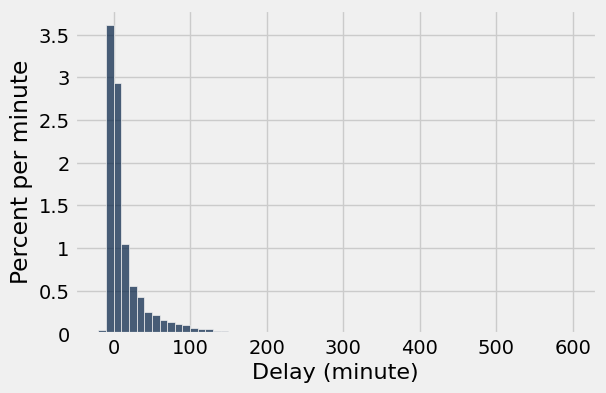

In [13]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

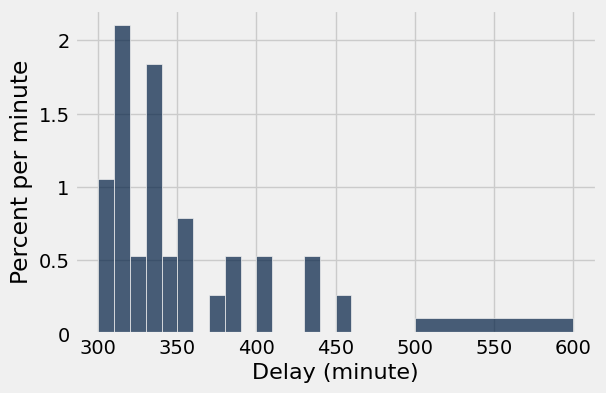

In [17]:
delay_bins = np.append(np.arange(300, 501, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [15]:
united.where('Delay', are.above(200)).num_rows

116

In [18]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

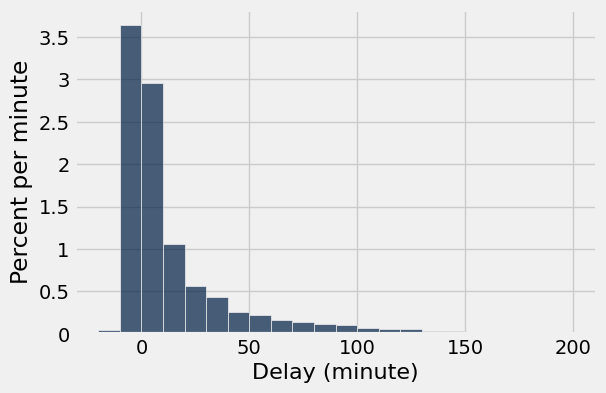

In [24]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [25]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

In [26]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

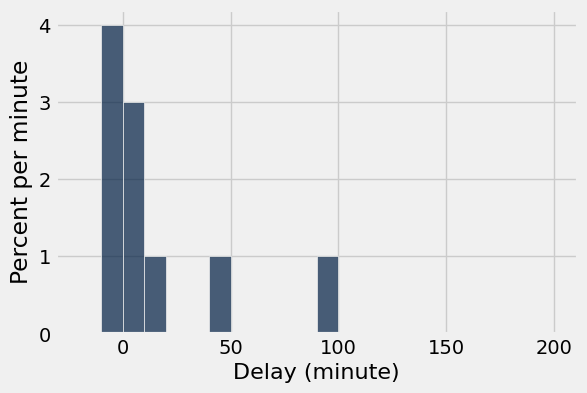

In [27]:
empirical_hist_delay(10)

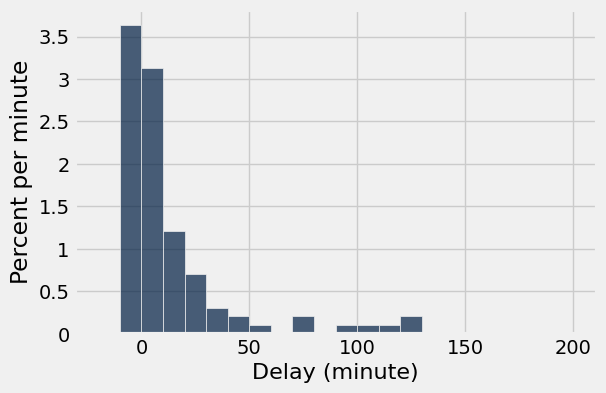

In [28]:
empirical_hist_delay(100)

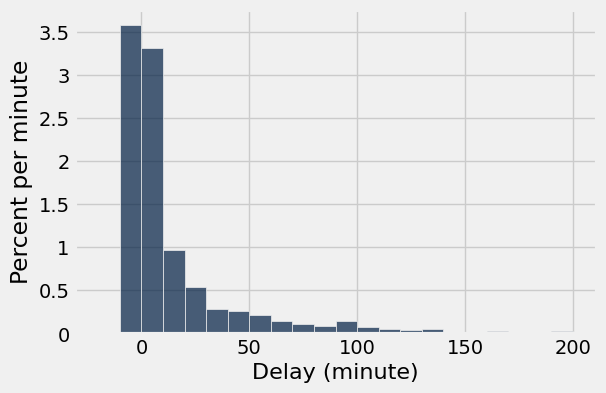

In [29]:
empirical_hist_delay(1000)

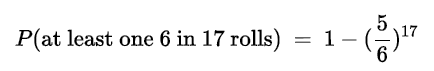

In [31]:
rolls = np.arange(1, 18, 1)
results = Table().with_columns(
  'Rolls', rolls,
  'Chance of at least one 6', 1 - (5/6)**rolls
)
results.where('Rolls', are.above(10))


Rolls,Chance of at least one 6
11,0.865412
12,0.887843
13,0.906536
14,0.922113
15,0.935095
16,0.945912
17,0.954927


In [32]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
  'Rolls', rolls,
  'Chance of at least one 6', 1 - (5/6)**rolls
)
results


Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


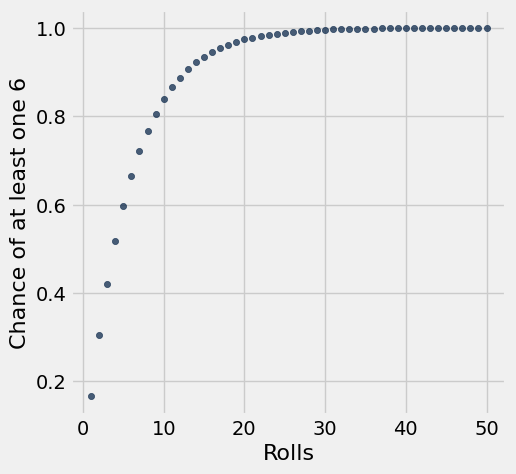

In [33]:
results.scatter('Rolls')

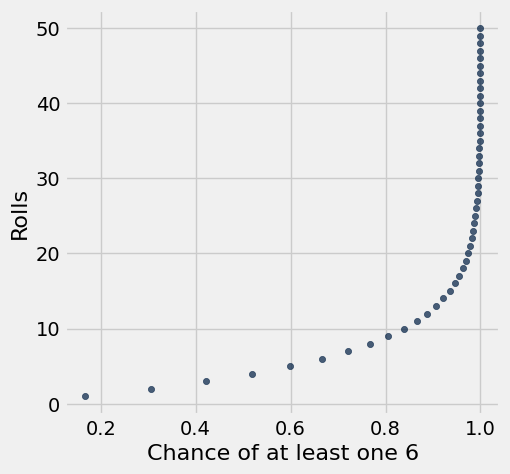

In [34]:
results.scatter( 'Chance of at least one 6')

In [35]:
results.where('Rolls', are.equal_to(50))

Rolls,Chance of at least one 6
50,0.99989
